# Find orthology group among gene with low all vs long similarity

We run pannzer to annotate proeteome as explain in this repo with the genome and annotation (from Ensembl v.104) for :
- Human (*Homo sapiens*)
- Mouse (*Mus musculus*)
- Trout (*Salmo trutta*)
- Tilapia (*Oreochromis niloticus*)

Then, we compute similarity table with the script `description_table.py`.

Then, we ask Ensembl Biomark for orthologeous group with the requests you can find in [`biomart_request.txt`](biomart_request.txt)

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
human_biomart : str = "human_biomart.txt"
mouse_biomart : str = "mouse_biomart.txt"
tilapia_biomart : str = "tilapia_biomart.txt"
trout_biomart : str = "trout_biomart.txt"

human_similarity : str = "human.table.similarity.txt"
mouse_similarity : str = "mouse.table.similarity.txt"
tilapia_similarity : str = "tilapia.table.similarity.txt"
trout_similarity : str = "trout.table.similarity.txt"

In [5]:
gene2og : dict[str, int] = dict()  # key is a gene id and value is an int, the id of the OG
new_group : int = 1

In [6]:
case_new_og = 0
case_single_og = 0
case_multi_og = 0

with open(human_biomart) as biomart:
    biomart.readline()
    for line in biomart:
        line = line.strip().split('\t')
        line = [item for item in line if item != '']
        belong_group = set()  # if a gene is already in a OG, add this OG the this set
        for id in line:
            if id in gene2og:
                belong_group.add(gene2og[id])
        
        if len(belong_group) == 0:  # all geneID are new, we create an OG and add all gene to this OG
            case_new_og += 1
            og = new_group
            for id in line:
                gene2og[id] = og
            new_group += 1

        elif len(belong_group) == 1:  # if one or multiple geneID come from an already assign OG, assign other ID to this one
            case_single_og += 1
            og = list(belong_group)[0]
            for id in line:
                gene2og[id] = og
        else:  # if two or more geneID are already assigned to different OG, we arbitrary assign all to one of them and reassign all gene in other OG to the select one
            case_multi_og += 1
            og = list(belong_group)[0]
            belong_group.remove(og)
            for id in line:
                gene2og[id] = og
            for k,v in gene2og.items():
                if v in belong_group:
                    gene2og[k] = og

print(case_new_og,case_single_og,case_multi_og)

68533 98464 19


In [7]:
case_new_og = 0
case_single_og = 0
case_multi_og = 0

with open(mouse_biomart) as biomart:
    biomart.readline()
    for line in biomart:
        line = line.strip().split('\t')
        line = [item for item in line if item != '']
        belong_group = set()  # if a gene is already in a OG, add this OG the this set
        for id in line:
            if id in gene2og:
                belong_group.add(gene2og[id])
        
        if len(belong_group) == 0:  # all geneID are new, we create an OG and add all gene to this OG
            case_new_og += 1
            og = new_group
            for id in line:
                gene2og[id] = og
            new_group += 1

        elif len(belong_group) == 1:  # if one or multiple geneID come from an already assign OG, assign other ID to this one
            case_single_og += 1
            og = list(belong_group)[0]
            for id in line:
                gene2og[id] = og
        else:  # if two or more geneID are already assigned to different OG, we arbitrary assign all to one of them and reassign all gene in other OG to the select one
            case_multi_og += 1
            og = list(belong_group)[0]
            belong_group.remove(og)
            for id in line:
                gene2og[id] = og
            for k,v in gene2og.items():
                if v in belong_group:
                    gene2og[k] = og

print(case_new_og,case_single_og,case_multi_og)

35982 107016 6


In [8]:
case_new_og = 0
case_single_og = 0
case_multi_og = 0

with open(tilapia_biomart) as biomart:
    biomart.readline()
    for line in biomart:
        line = line.strip().split('\t')
        line = [item for item in line if item != '']
        belong_group = set()  # if a gene is already in a OG, add this OG the this set
        for id in line:
            if id in gene2og:
                belong_group.add(gene2og[id])
        
        if len(belong_group) == 0:  # all geneID are new, we create an OG and add all gene to this OG
            case_new_og += 1
            og = new_group
            for id in line:
                gene2og[id] = og
            new_group += 1

        elif len(belong_group) == 1:  # if one or multiple geneID come from an already assign OG, assign other ID to this one
            case_single_og += 1
            og = list(belong_group)[0]
            for id in line:
                gene2og[id] = og
        else:  # if two or more geneID are already assigned to different OG, we arbitrary assign all to one of them and reassign all gene in other OG to the select one
            case_multi_og += 1
            og = list(belong_group)[0]
            belong_group.remove(og)
            for id in line:
                gene2og[id] = og
            for k,v in gene2og.items():
                if v in belong_group:
                    gene2og[k] = og

print(case_new_og,case_single_og,case_multi_og)

13717 121187 1


In [9]:
case_new_og = 0
case_single_og = 0
case_multi_og = 0

with open(trout_biomart) as biomart:
    biomart.readline()
    for line in biomart:
        line = line.strip().split('\t')
        line = [item for item in line if item != '']
        belong_group = set()  # if a gene is already in a OG, add this OG the this set
        for id in line:
            if id in gene2og:
                belong_group.add(gene2og[id])
        
        if len(belong_group) == 0:  # all geneID are new, we create an OG and add all gene to this OG
            case_new_og += 1
            og = new_group
            for id in line:
                gene2og[id] = og
            new_group += 1

        elif len(belong_group) == 1:  # if one or multiple geneID come from an already assign OG, assign other ID to this one
            case_single_og += 1
            og = list(belong_group)[0]
            for id in line:
                gene2og[id] = og
        else:  # if two or more geneID are already assigned to different OG, we arbitrary assign all to one of them and reassign all gene in other OG to the select one
            case_multi_og += 1
            og = list(belong_group)[0]
            belong_group.remove(og)
            for id in line:
                gene2og[id] = og
            for k,v in gene2og.items():
                if v in belong_group:
                    gene2og[k] = og

print(case_new_og,case_single_og,case_multi_og)

11444 133658 0


In [12]:
def get_candidate_gene(similarity_path : str, proportion : float) -> set[str]:
    data : pd.DataFrame = pd.read_csv(similarity_path, sep='\t')
    threshold : float = np.nanpercentile(data['BP_similarity_longest'], proportion)
    return set(data[data['BP_similarity_longest'] <= threshold]['gene_id'].apply(lambda x: x.split(':')[1]))

def get_available_gene(similarity_path : str, proportion : float, all_available_gene : set[str]) -> set[str]:
    candidate_gene : set[str] = get_candidate_gene(similarity_path, proportion)
    return set.intersection(candidate_gene, all_available_gene)

In [13]:
def count_genes_by_OG(list_genes : list[str], gene2og : dict) -> dict[int, int]:
    og2count : dict[int, int] = dict()
    for geneid in list_genes:
        og : int = gene2og[geneid]
        if og in og2count:  # count the number of gene by OG, if the OG already referenced, add 1, else initialize at 1
            og2count[og] += 1
        else:
            og2count[og] = 1
    return og2count

def count_each_count(count_dict) -> dict[int, int]:
    count2count : dict[int, int]= dict()

    for count in count_dict.values():
        if count in count2count:
            count2count[count] += 1
        else:
            count2count[count] = 1
    return count2count


def make_graph(list_similarity_path : list[str], gene2og : dict, proportion : float) -> None:

    all_genes : list[str] = []
    for species in list_similarity_path:
        all_genes.extend(get_available_gene(species, proportion, set(gene2og.keys())))
    og2count : dict[int, int] = count_genes_by_OG(all_genes, gene2og)
    count2count : dict[int, int] = count_each_count(og2count)

    fig = sns.barplot(x=count2count.keys(), y=count2count.values())
    fig.set_xlabel('Number of gene in OG')
    fig.set_ylabel('Count')
    fig.set_title('Histogram of the number of gene by OG')

## Using 3% of genes with lowest BP similarity

/tmp/ipykernel_59335/2396617037.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data : pd.DataFrame = pd.read_csv(similarity_path, sep='\t')


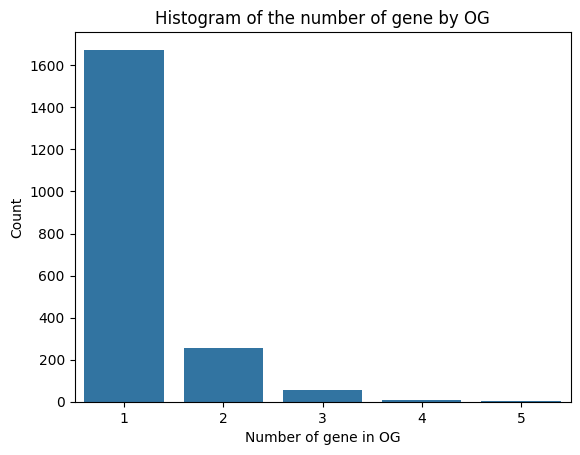

In [14]:
similarity_df_list = [human_similarity, mouse_similarity, tilapia_similarity, trout_similarity]
make_graph(similarity_df_list, gene2og, 3)

## Using all genes

/tmp/ipykernel_59335/2396617037.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data : pd.DataFrame = pd.read_csv(similarity_path, sep='\t')


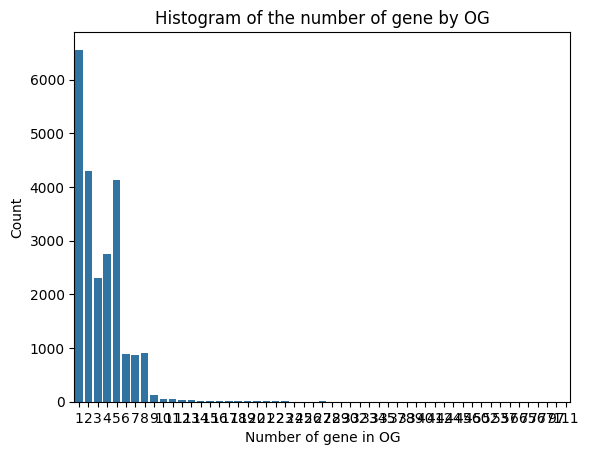

In [15]:
similarity_df_list = [human_similarity, mouse_similarity, tilapia_similarity, trout_similarity]
make_graph(similarity_df_list, gene2og, 100)